# Image Segmentation

**Image segmentation** is a computer vision task that is used to label specific regions of an image according to what's shown.
To do this, each pixel is labelled with a corresponding **class**. It's sometimes called **dense prediction**. It does not predict instances between the same class (for instance, it does not tell you males vs females for persons in the image below). That is called **instance segmentation**.

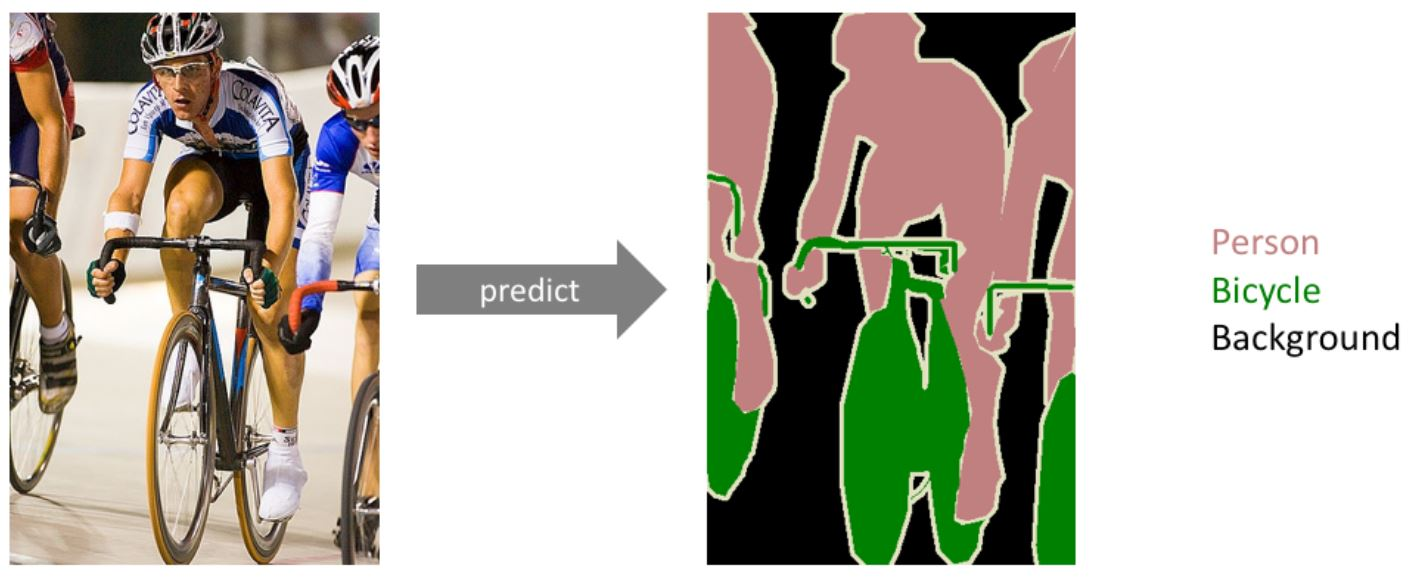

The goal of image segmentation is to take a RGB (height, width, 3) or greyscale (height, width, 1) image and output a segmentation map where each pixel is represented as an integer (height, width, 1).

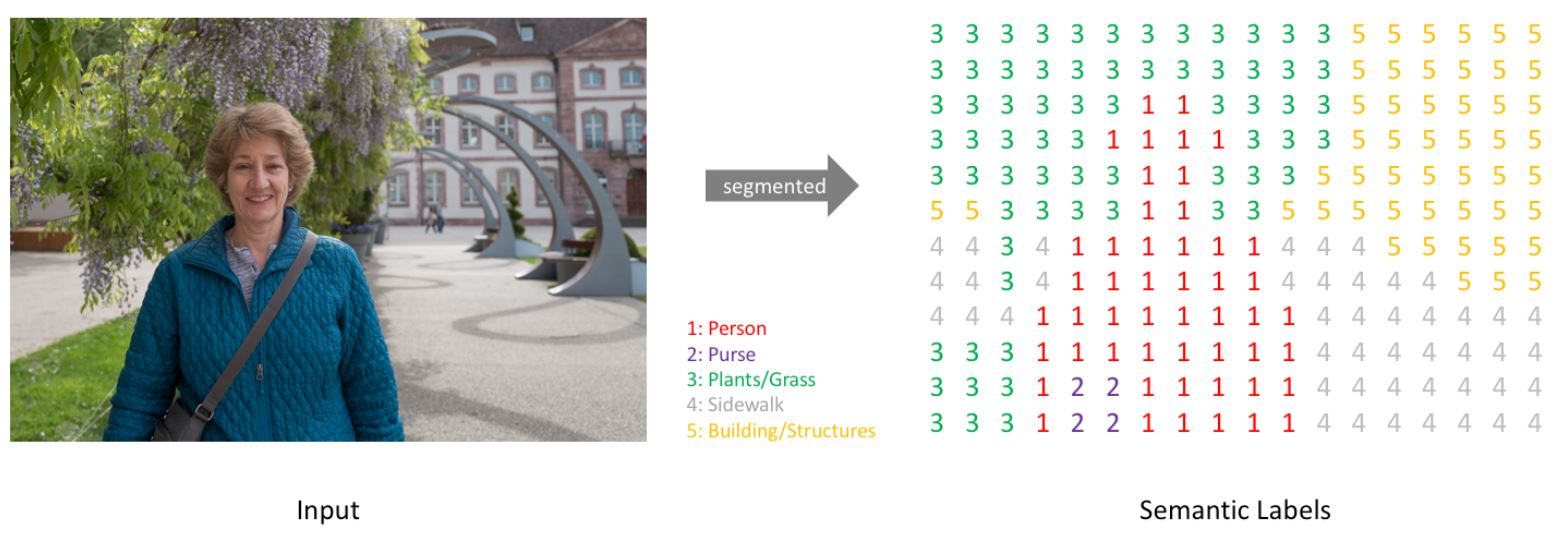

We do this by one-hot encoding the image class labels. Prediction then turned into segmentation map by using the argmax of each pixel vector.

 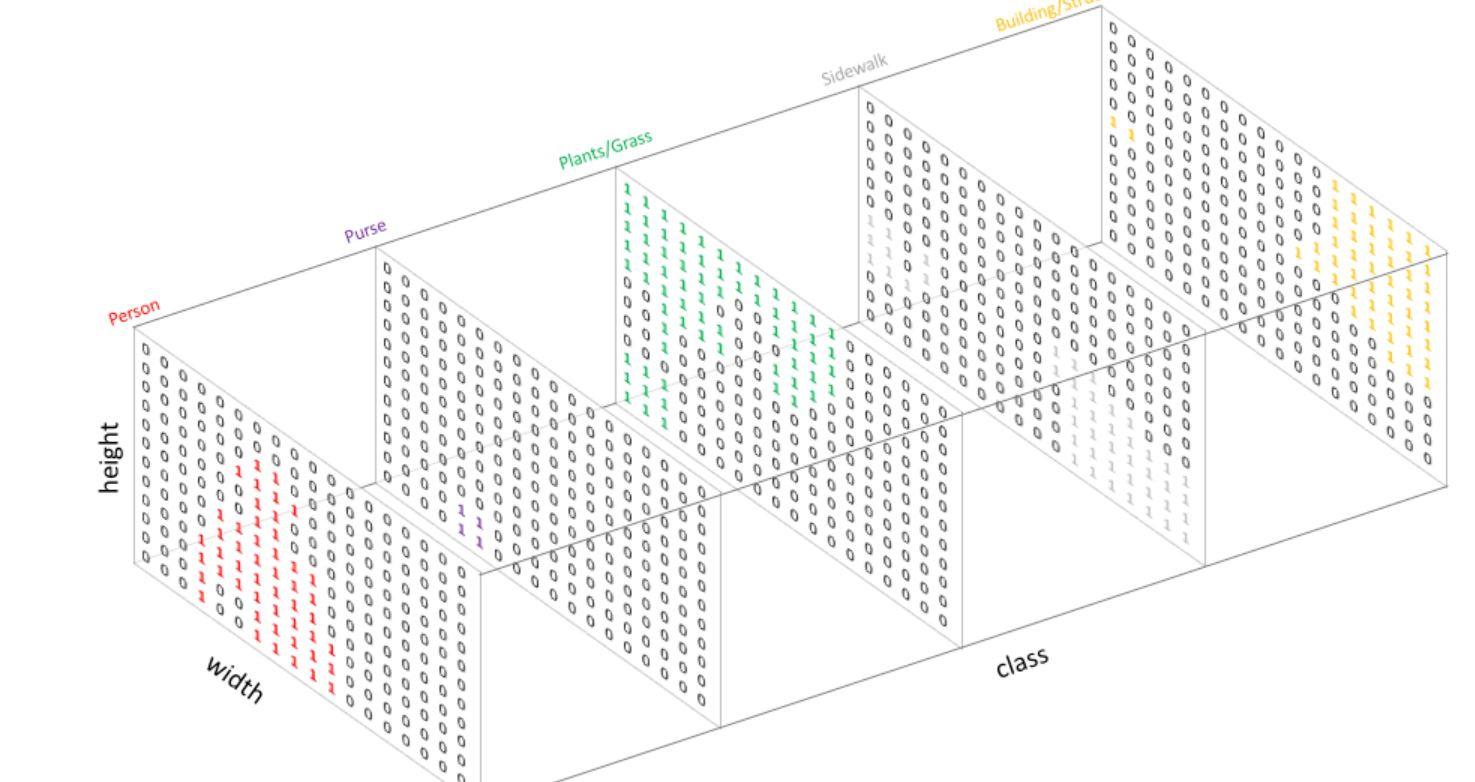

# Architecture

Can stack convolutional layers together with padding=same to preserve the dimensions and output a final segmentation map. This is computationally expensive to preserve the full resolution. An example of this is shown below.

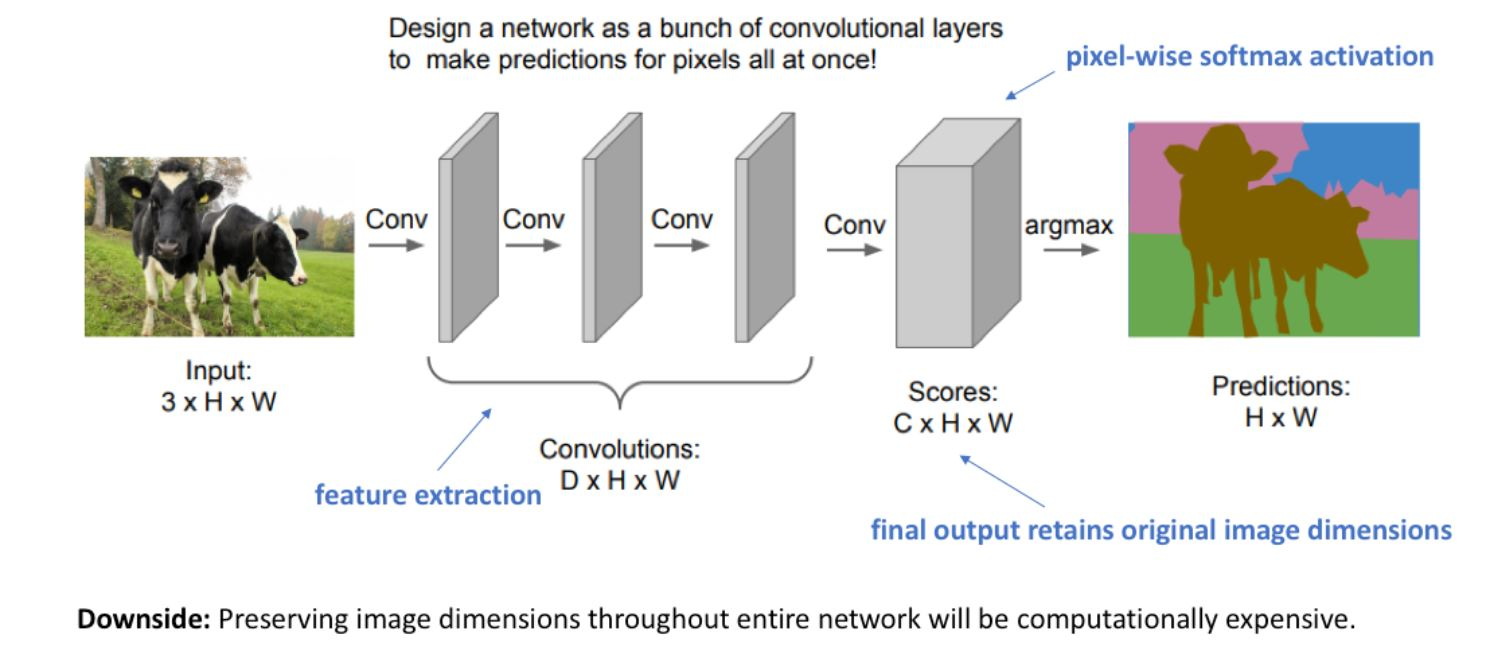

Deeper layers tend to learn more high-level and complicated feature mappings, while shallower layers learn more low-level concepts. Because of this, we tend to increase the number of feature maps (channels) for the deeper layers.

# Encoder/Decoder

The Encoder/Decoder model architecture is popular for image segmentation, where we downsample the spatial resolution of the input, developing lower resolution feature mappings which learn to be highly efficient at discriminating between classes, then upsample the feature representations into a full-resolution segmentation map

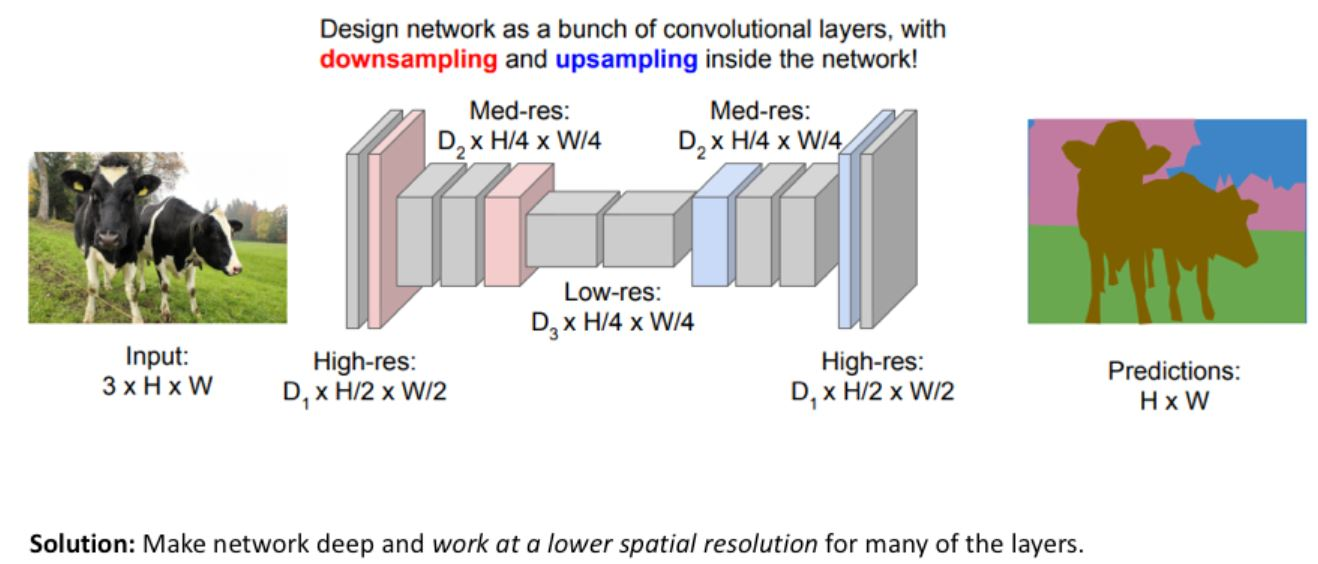

# Upsampling Methods

Pooling operations downsample the map by summarizing areas into a single value(average or max pooling), **unpooling** operations upsample the map by turning a single value into a higher resolution

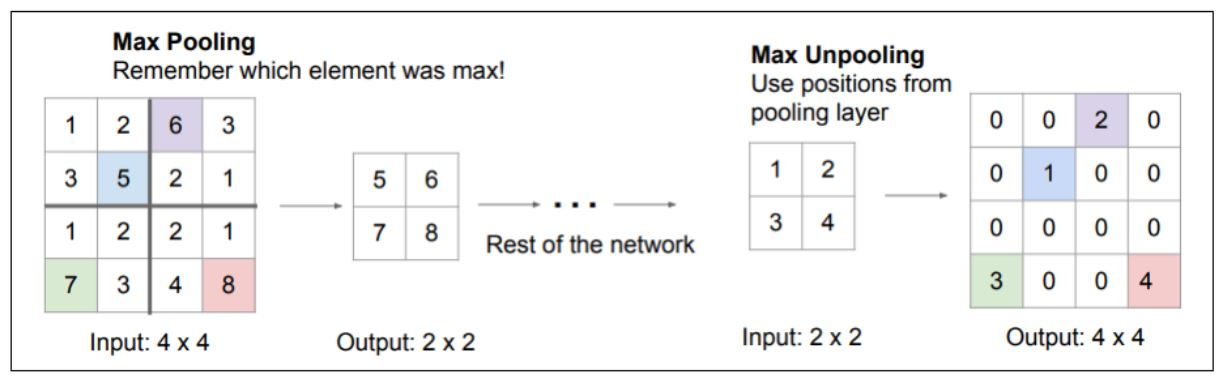

It's more popular to use  **transpose convolutions** since they allow us to develop a learned upsampling. A typical convolution will take the dot product between the kernal and the input value and produce a value for the output. For transpose convolution we take a single value from the feature map and multiply the weights in our filter (kernal) by this value then project these filters multiplied by weights onto the ouput feature map. If the filter size produces overlap, then the overlapping values are summed together. The overlapping values is undesirable so effort the limit this by having a filter that doesn't produce overlap is reccommended.

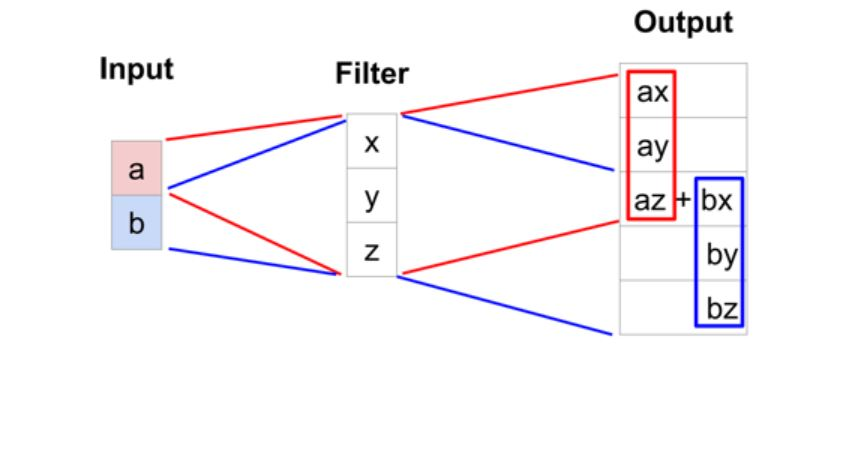

# FCNN

Cross entropy loss pixel-wise was the loss function, comparing each pixel individually, determining the error between the class predictions and the one hot encoded target vector. The **Dice coefficient loss function** is another loss function that is popular. 

Decoder of Long et al (2014) struggled to produce fine grained segmentations, with segmentations looking like blobs. This was addressed by adding **skip connections** into the model from earlier layers, then summing these feature maps. These skip connections provide the necessary details to produce more accurate segmentations.

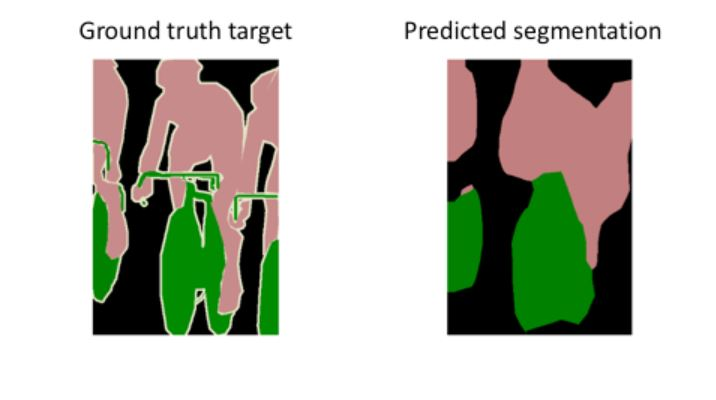

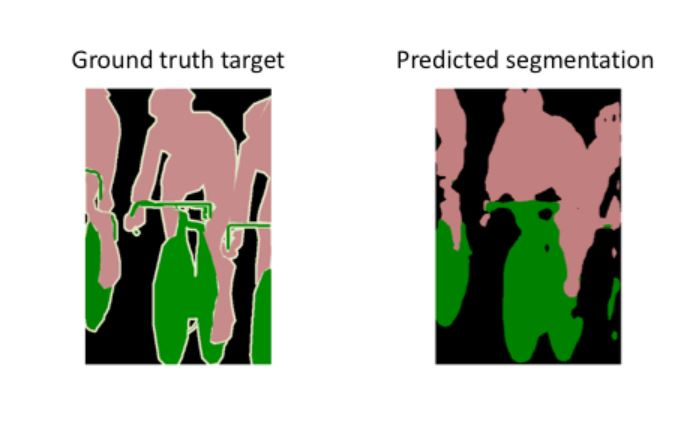

Ronneburgur et al possibly improved this further by improving the decoder. Propse U-net architecture. If this is useful depends on the problem.

The FC-DenseNet103 model by Jegou et al 2017 is another model that should be looked at.